In [38]:
# Include libraries, etc
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
LABELS= ["Rechazado","Aprobado"]

In [39]:
dataframe = pd.read_csv("./dataset/train.csv")
# remove unnecessary loan_id column
dataframe = dataframe.drop("Loan_ID", axis=1)

In [40]:
# map strings to integers
dataframe["Gender"] = dataframe["Gender"].map({"Male":1,"Female":2})
dataframe["Married"] = dataframe["Married"].map({"Yes":1,"No":0})
dataframe["Education"] = dataframe["Education"].map({"Graduate":1,"Not Graduate":0})
dataframe["Self_Employed"] = dataframe["Self_Employed"].map({"Yes":1,"No":0})
dataframe["Property_Area"] =  dataframe["Property_Area"].map({"Semiurban": 1,"Urban":2,"Rural":3})
dataframe["Dependents"] =  dataframe["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
dataframe["Loan_Status"] = dataframe["Loan_Status"].map({"N":0,"Y":1})
dataframe = dataframe.fillna(0)

print("Percentages")
print(100 * dataframe['Loan_Status'].value_counts(normalize=True))


Percentages
Loan_Status
1    68.729642
0    31.270358
Name: proportion, dtype: float64


In [41]:
# Split training and testing data
X = dataframe.drop("Loan_Status", axis=1)
Y = dataframe["Loan_Status"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y.values.reshape(-1,1),
    train_size=0.8,
    random_state=1234,
    shuffle=True
)

In [42]:
# Función para mostrar resultados
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Real')
    plt.xlabel('Predicción')
    plt.show()
    print (classification_report(y_test, pred_y))

In [43]:
# Modelo base, sin usar técnicas de balanceo de clases
base_model = LogisticRegression(solver="newton-cg")
base_model.fit(X_train, Y_train)

LogisticRegression(solver='newton-cg')

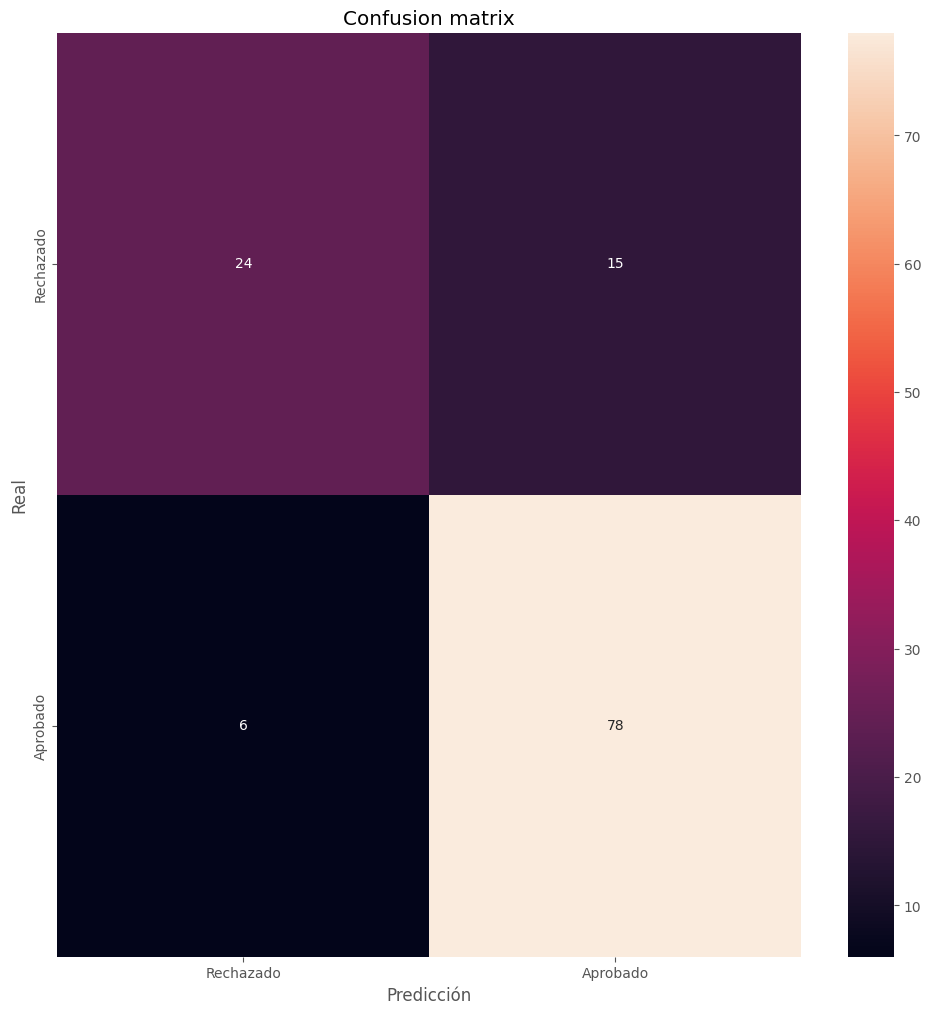

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        39
           1       0.84      0.93      0.88        84

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.79       123
weighted avg       0.83      0.83      0.82       123



In [46]:
Y_pred = base_model.predict(X_test)
y_pred_new_threshold = (base_model.predict_proba(X_test)[:, 1] >= 0.6).astype(int)
mostrar_resultados(Y_test, y_pred_new_threshold)

In [47]:
# Nuevo modelo esta usando la estrategia de penalización para balancear las clases
clf = LogisticRegression(solver="newton-cg",class_weight="balanced")
clf.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

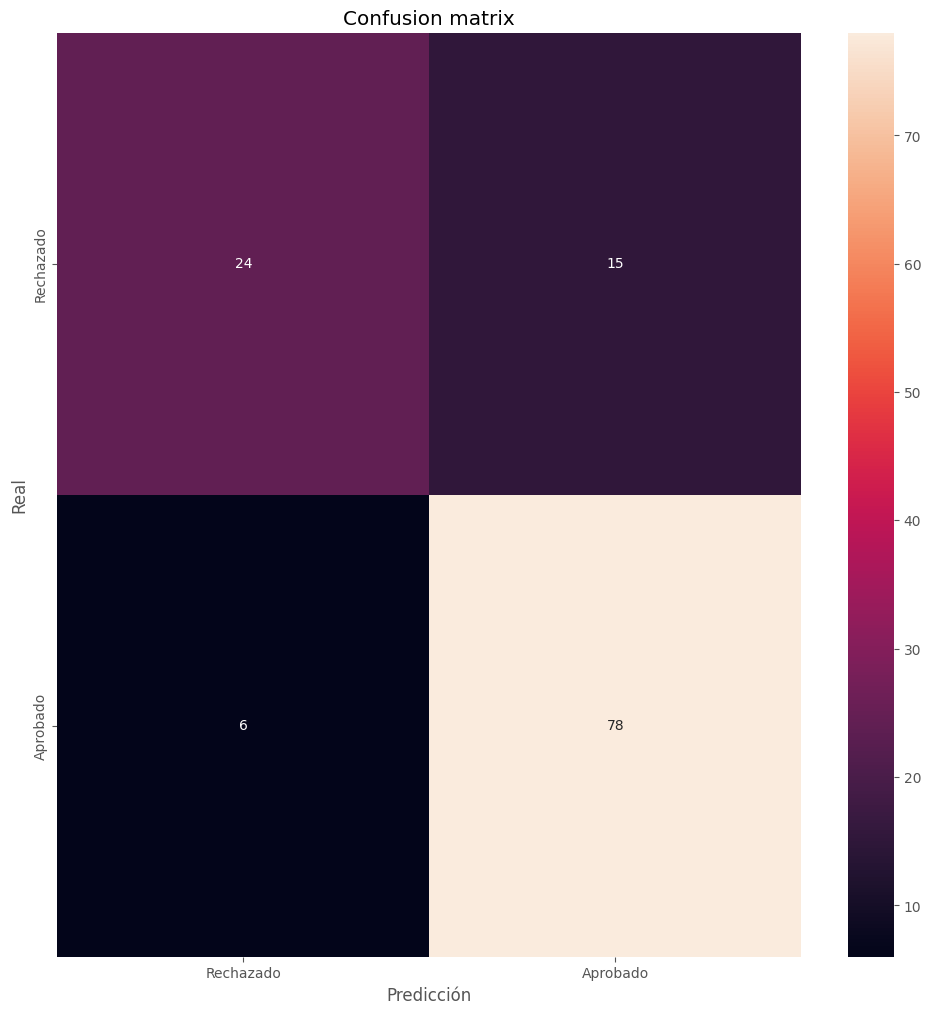

              precision    recall  f1-score   support

           0       0.80      0.62      0.70        39
           1       0.84      0.93      0.88        84

    accuracy                           0.83       123
   macro avg       0.82      0.77      0.79       123
weighted avg       0.83      0.83      0.82       123



In [49]:
pred_y2 = clf.predict(X_test)
y_pred_new_threshold_2 = (base_model.predict_proba(X_test)[:, 1] >= 0.6).astype(int)
mostrar_resultados(Y_test, y_pred_new_threshold_2)

# Conclusiones

- El modelo parece ser bastante sensible, en otras palabras tiene una buena capacidad para identificar casos positivos reales
- Sin embargo, la especificidad es relativamente baja, esto indica que hay margen para mejorar la capacidad del modelo para identificar correctamente los casos negativos reales; es probable que esto sea ocasionado porque las clases no están balanceadas: hay una gran mayoría de casos donde el préstamo es aprobado. Al usar técnicas de balanceo como la penalización, se nota una mejora clara en la sensibilidad
- La precisión es aceptable, pero puede ser útil considerar el equilibrio entre precisión, sensibilidad y especificidad según los requisitos específicos del problema.